# DSCI 100-004: Group 19 Project

Aadeesh Nargotra, Hongwei Wang, Joshua Tan, Nayeon Lee

## Table of Contents:
* [Introduction](#introduction)
    * [Background and significance](*background)
* [Methods](#methods)
    * [Installing and loading the required packages](#installing)
    * [Reading the airplane dataset](#reading)
    * [Reducing the size of the dataset](#reducing)

## Introduction <a name="introduction"></a>

### Background and significance <a name="background"></a>

Airlines regularly receive feedback from customers who utilize their planes based on their experience. A major responsibility of airlines when it comes to providing amenities is to ensure that customers have the best possible experience while flying. By identifying areas for improvement, airlines would be able to better understand customer needs, thereby increasing customer retention. We will be answering our predictive question, “can we predict the next customer’s satisfaction as satisfied or dissatisfied based on the airplane satisfaction data?”  The factors that can determine our classification include, departure/arrival delays, gate location, online boarding, inflight entertainment, legroom service, check-in service, inflight wifi service, food and drink, seat comfort, on-board service baggage handling, and cleanliness. We will be utilizing ‘Airline Passenger Satisfaction’ dataset by T.J. Klein on Kagle. https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data


In [6]:
#TODO: Add information about what the dataset includes. I.e., what each column has 
# TODO: Perhaps add citations here?

## Methods <a name="methods"></a>

### Installing and loading the required packages <a name="installing"></a>

In [1]:
library(tidyverse)
install.packages("janitor")
library(janitor)
library(tidymodels)
install.packages("gridExtra")
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ─

### Reading the airplane dataset <a name="reading"></a>

The airplane data that was downloaded from Kaggle was already split into a test and training set. Specifcially, the dataset was split such that 20% of the data was in the testing set and 80% was in the training set. 

In [2]:
test_set <- read_csv("Airplane Data/test.csv") 
train_set <- read_csv("Airplane Data/train.csv")

New names:
• `` -> `...1`
Rows: 25976 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Gender, Customer Type, Type of Travel, Class, satisfaction
dbl (20): ...1, id, Age, Flight Distance, Inflight wifi service, Departure/A...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 103904 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Gender, Customer Type, Type of Travel, Class, satisfaction
dbl (20): ...1, id, Age, Flight Distance, Inflight wifi service, Departure/A...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Reducing the size of the dataset <a name="reducing"></a>

As specified by the output after using `read_csv()` on both sets, the dataset is extremely large with 129,880 total observations and 25 columns. As such, our TA advised us to reduce the dataset into 1/5th of it's original size. To accomplish this, we combined the test and training datasets using `rbind()` and used the `slice()` function to only keep every 5th observation.

In [126]:
airplane_data <- rbind(test_set, train_set)
airplane_data <- airplane_data |>
              slice(seq(from = 1, to = 129880, by = 5))
nrow(airplane_data)

[1] 25976

Using `nrow()` confirms that our dataset now has 25976 observations compared to the 129,880 observations we previously had.

### Cleaning the Airplane Dataset

In [127]:
head(airplane_data)

...1 id    Gender Customer Type  Age Type of Travel  Class    Flight Distance
1  0   19556 Female Loyal Customer 52  Business travel Eco       160           
2  5   39177 Male   Loyal Customer 16  Business travel Eco       311           
3 10   47583 Female Loyal Customer 47  Business travel Eco      1235           
4 15   22470 Male   Loyal Customer 50  Personal Travel Eco        83           
5 20   63995 Male   Loyal Customer 60  Business travel Business  612           
6 25    7823 Male   Loyal Customer 62  Personal Travel Eco       710           
  Inflight wifi service Departure/Arrival time convenient ⋯
1 5                     4                                 ⋯
2 3                     3                                 ⋯
3 4                     1                                 ⋯
4 3                     4                                 ⋯
5 4                     4                                 ⋯
6 3                     5                                 ⋯
  Inflight entertainment On-board service Leg room service Baggage handling
1 5                      5                5                5               
2 5                      4                3                1               
3 3                      3                4                3               
4 2                      4                2                4               
5 5                      5                5                5               
6 2                      3                5                5               
  Checkin service Inflight service Cleanliness Departure Delay in Minutes
1 2               5                5           50                        
2 1               2                5            0                        
3 1               3                4           29                        
4 4               5                2            5                        
5 5               5                5           21                        
6 4               4                2            0                        
  Arrival Delay in Minutes satisfaction           
1 44                       satisfied              
2  0                       satisfied              
3 19                       satisfied              
4  2                       neutral or dissatisfied
5 49                       satisfied              
6  0                       neutral or dissatisfied

<font size= '2'> **Table 1:** Using `head()` on our reduced airplane dataset reveals information about the column names and their datatypes

Now that the data set is more manageable, we began cleaning our data to prepare for it for analysis. Upon using `head()`, we noticed that the columns weren't in a clean format. Thus, we used the `clean_names()` function to make the column names into snake_case.

Next, we needed to remove unnecessary columns that we knew we would not need for our knn analysis. Specifically, we removed the `...1` and `id` columns as they were arbitrary passenger identifiers. We also removed the `Gender`, `Customer Type`, `Age`, `Type of Travel`, and `Class` columns as they are not numerical and thus would not be used for the knn analysis. Finally, although being a numerical variable, we removed `Flight Distance` as we felt that it was not as relevant to a passenger's overall satisfaction. Indeed, the flight distance is a variable  that airlines cannot improve upon as it is simply out of their control.

We assigned all these changes to a new variable called `airplane_data_cleaned`.

In [128]:
airplane_data_cleaned <- airplane_data |>
              clean_names() |>
              select(9:25)

Additionally, as the data set was too big to visually see if there were any missing data (i.e., NAs), we used the `map_df()` function to create a summary table of any NA's in a given column.

In [129]:
map_df(airplane_data_cleaned, ~sum(is.na(.))) 

inflight_wifi_service departure_arrival_time_convenient
1 0                     0                                
  ease_of_online_booking gate_location food_and_drink online_boarding
1 0                      0             0              0              
  seat_comfort inflight_entertainment on_board_service leg_room_service
1 0            0                      0                0               
  baggage_handling checkin_service inflight_service cleanliness
1 0                0               0                0          
  departure_delay_in_minutes arrival_delay_in_minutes satisfaction
1 0                          75                       0

<font size= '2'> **Table 2:** A summary table of the number of missing data in each column.

The `map_df()` function revealed that there were 75 NA's in the `arrival_delay_in_minutes` column. Because there were only a few rows with missing data (i.e., 75 rows), we felt comfortable dropping them as they likely wouldn't affect our k-nn analysis. As such, we used the `drop_na` function to remove the rows with an NA in the `arrival_delay_in_minutes` column.

In [132]:
airplane_data_cleaned <- airplane_data_cleaned |> drop_na()
as_tibble(sum(is.na(airplane_data_cleaned))) |> 
    rename(total_na = value)
nrow(airplane_data_cleaned)

total_na
1 0

[1] 25901

<font size= '2'> **Table 3:** Using the `as_tibble` function in conjunction with`sum(is.na()` and `rename()` created a table of the total NA's in our dataset. As expected, there are now zero NA's in our data set. Additionally, `nrow()` reveals that our dataset has been reduced from 25976 rows to 25901 rows—consistent with the removal of the 75 rows with NA's.

Finally, given that we want to predict the `satisfaction` label of a given observation, we converted the `satisfacation` column from a character class to the factor datatype.

In [109]:
airplane_data_cleaned <- airplane_data_cleaned|> 
                      mutate(satisfaction = as_factor(satisfaction))
class(airplane_data_cleaned$satisfaction)

[1] "factor"

The `class` function confirms that the `satisfaction` column is now a factor datatype.

### Splitting the airplane_cleaned_data into training and test sets

Once the airplane data set was cleaned, we split it into our training and test sets using the `initial_split()` function. By setting the `strata` argument to `satisfaction`, we ensure that the data is stratified by the `satisfaction` variable. Furthermore, setting `prop = 0.75` ensures that 75% of the original data set ends up in the training set. In addition, `initial_split()` ensures that the proportions between observations that are either a) satisfied or b) neutral or dissatisfied are the same for both training and test sets. 

We assigned the training and test sets to `airplane_train` and `airplane_test`, respectively.

In [110]:
set.seed(1234)

airplane_split <- initial_split(airplane_data_cleaned, prop = 0.75, strata = satisfaction)
airplane_train <- training(airplane_split)
airplane_test <- testing(airplane_split)

### Exploring the training set

As part of the exploratory data analysis, we calculated the count and percentage of satisfied and netural or dissatisfied observations in the training set. To accomplish this, we used the `group_by()` function in conjunction with`summarize()`. 

In [133]:
num_obs <- nrow(airplane_train)
airplane_train |> 
    group_by(satisfaction) |>
    summarize(
            count = n(),
            percentage = n() / num_obs * 100
              )

satisfaction            count percentage
1 satisfied                8380 43.14028  
2 neutral or dissatisfied 11045 56.85972

<font size= '2'> **Table 4:** The count and percentage of observations in the training set grouped by satisfaction.

The above table reveals that we have 8380 (~ 43.14%) observations that were classified as satisfied and 11045 (~ 56.86%) that were classified as neutral or dissatisfied. Indeed, it looks like there are slightly more passengers who are neutral or dissatisfied with their airline experience compared to passengers who are satisfied.

In [68]:
# The means of potential predictor variables that are numerical datatype only 

airplane_means_total <- airplane_train |>
    select(7:23) |>
    map_df(mean)

# The total of each column 

airplane_total_observations <- airplane_train |>
                            group_by(satisfaction) |>
                            summarize(total_n = n()) |>
                            pivot_wider(names_from = satisfaction, values_from = total_n) |>
                            clean_names() |>
                            rename(n_satisfied = satisfied) |>
                            rename(n_neutral_or_dissatisfied = neutral_or_dissatisfied)

airplane_means_and_total <- merge(airplane_total_observations, airplane_means_total)
airplane_means_and_total

# The means of potential predictor variables, grouped by satisfaction that are numerical datatype only 

# airplane_means_grouped <- airplane_train |>
#     group_by(satisfaction) |>
#     summarize(across(flight_distance:arrival_delay_in_minutes, mean))

# airplane_means_grouped

n_satisfied n_neutral_or_dissatisfied flight_distance inflight_wifi_service
1 8380        11045                     1185.59         2.719279             
  departure_arrival_time_convenient ease_of_online_booking gate_location
1 3.042831                          2.745431               2.982548     
  food_and_drink online_boarding seat_comfort inflight_entertainment
1 3.206795       3.243501        3.436808     3.35722               
  on_board_service leg_room_service baggage_handling checkin_service
1 3.383938         3.339356         3.62749          3.295959       
  inflight_service cleanliness departure_delay_in_minutes
1 3.636036         3.283552    14.33498                  
  arrival_delay_in_minutes
1 14.70857

### Visualizing Airplane Training Data in Plots

In [69]:
options(repr.plot.width = 15, repr.plot.height = 8)

plot_wifi <- airplane_train |>
        ggplot(aes(x = inflight_wifi_service, fill = satisfaction)) +
                geom_bar(stat = "count", position = "dodge") +
        labs(x = "Inflight Wifi Service", y = "Count")

plot_departure_arrival <- airplane_train |>
        ggplot(aes(x = departure_arrival_time_convenient, fill = satisfaction)) +
                geom_bar(stat = "count", position = "dodge") +
        labs(x = "Conveniency of Departure/Arrival Time", y = "Count")

plot_online_booking <- airplane_train |>
        ggplot(aes(x = ease_of_online_booking, fill = satisfaction)) +
                geom_bar(stat = "count", position = "dodge") +
        labs(x = "Ease of Online Booking", y = "Count")

plot_gate_location <- airplane_train |>
        ggplot(aes(x = gate_location, fill = satisfaction)) +
                geom_bar(stat = "count", position = "dodge") +
        labs(x = "Gate Location", y = "Count")

plot_food_and_drink <- airplane_train |>
        ggplot(aes(x = food_and_drink, fill = satisfaction)) +
                geom_bar(stat = "count", position = "dodge") +
        labs(x = "Food and Drink", y = "Count")

plot_online_boarding <- airplane_train |>
        ggplot(aes(x = online_boarding, fill = satisfaction)) +
                geom_bar(stat = "count", position = "dodge") +
        labs(x = "Online Boarding", y = "Count")

plot_seat_comfort <- airplane_train |>
        ggplot(aes(x = seat_comfort, fill = satisfaction)) +
                geom_bar(stat = "count", position = "dodge") +
        labs(x = "Seat Comfort", y = "Count")

plot_entertainment <- airplane_train |>
        ggplot(aes(x = inflight_entertainment, fill = satisfaction)) +
                geom_bar(stat = "count", position = "dodge") +
        labs(x = "Inflight Entertainment", y = "Count")

plot_onboard_service <- airplane_train |>
        ggplot(aes(x = on_board_service, fill = satisfaction)) +
                geom_bar(stat = "count", position = "dodge") +
        labs(x = "On-Board Service", y = "Count")

plot_leg_room_service <- airplane_train |>
        ggplot(aes(x = leg_room_service, fill = satisfaction)) +
                geom_bar(stat = "count", position = "dodge") +
        labs(x = "Leg Room Service", y = "Count")

plot_baggage_handling <- airplane_train |>
        ggplot(aes(x = baggage_handling, fill = satisfaction)) +
                geom_bar(stat = "count", position = "dodge") +
        labs(x = "Baggage Handling", y = "Count")

plot_checkin_service <- airplane_train |>
        ggplot(aes(x = checkin_service, fill = satisfaction)) +
                geom_bar(stat = "count", position = "dodge") +
        labs(x = "Check-In Service", y = "Count")

plot_cleanliness <- airplane_train |>
        ggplot(aes(x = cleanliness, fill = satisfaction)) +
                geom_bar(stat = "count", position = "dodge") +
        labs(x = "Cleanliness", y = "Count")


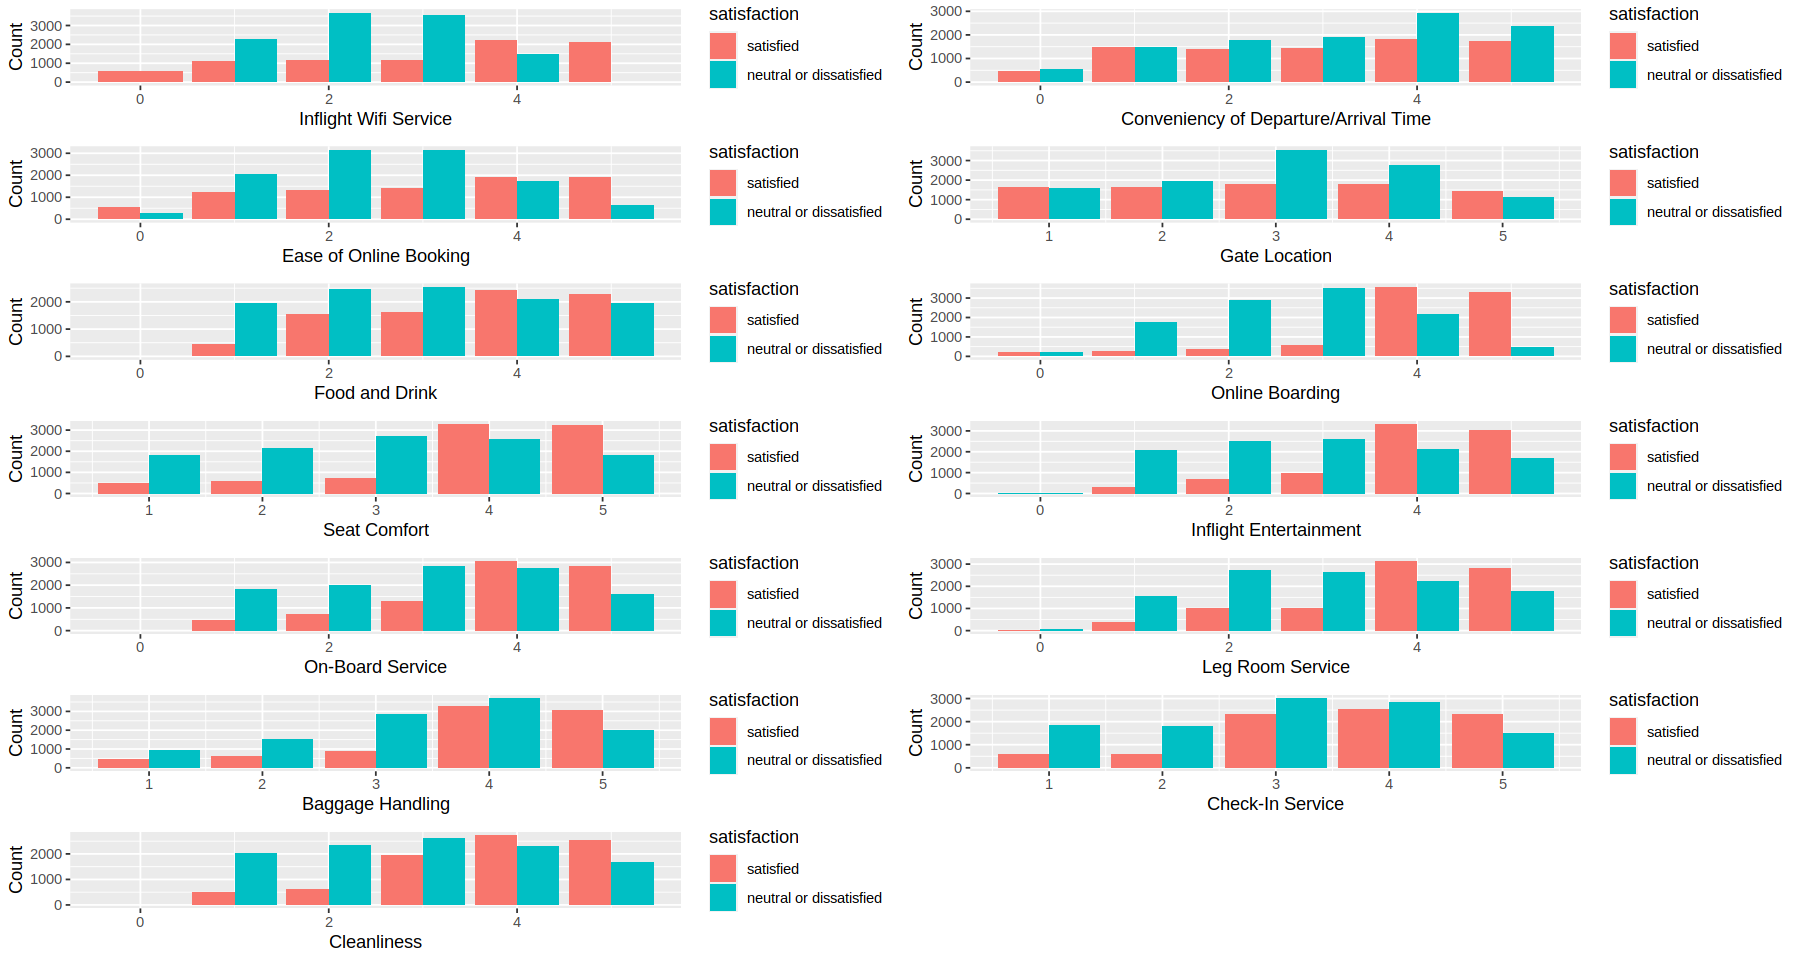

In [70]:
all_plots <- grid.arrange(plot_wifi, plot_departure_arrival, plot_online_booking, plot_gate_location, 
                        plot_food_and_drink, plot_online_boarding, plot_seat_comfort, plot_entertainment,
                        plot_onboard_service, plot_leg_room_service, plot_baggage_handling, plot_checkin_service,
                        plot_cleanliness, ncol = 2)


Warning message:
“Removed 140 rows containing missing values (`geom_point()`).”


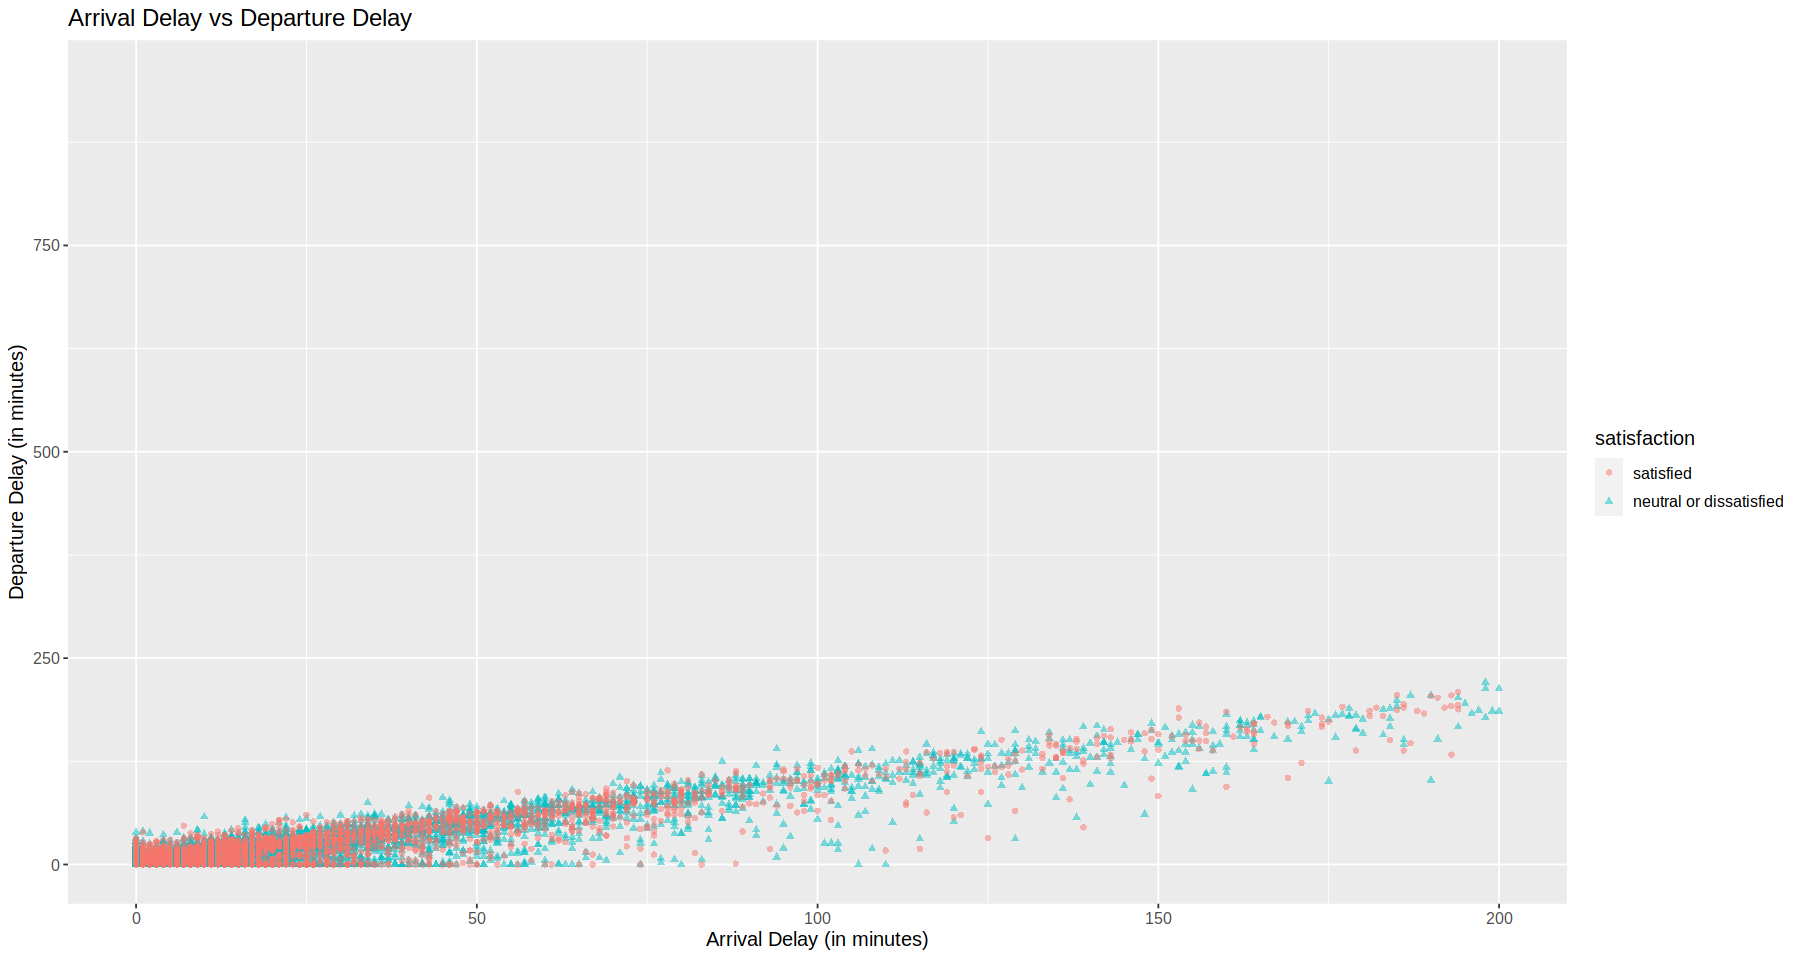

In [85]:
arrival_departure_delay_plot <- airplane_train |>
                            ggplot(aes(x = arrival_delay_in_minutes, y = departure_delay_in_minutes, color = satisfaction, shape = satisfaction)) +
                            geom_point(alpha = 0.5) + 
                            theme(text = element_text(size = 12)) +
                            labs(x = "Arrival Delay (in minutes)", y = "Departure Delay (in minutes)") + 
                            ggtitle("Arrival Delay vs Departure Delay") + 
                            xlim(c(0,200))

arrival_departure_delay_plot

## Methods

Based on the data analysis will be done through a varying process of graphs. It appears that the analysis is focused on visualizing various factors affecting the satisfaction of airline passengers. The data includes different variables related to airplane services, and the visualizations aim to show the relationship between these variables and passenger satisfaction.
For a more accurate prediction, we focus on columns that potentially have a strong correlation with passenger satisfaction. Here's a brief outline: Numerical Variables: flight_distance, arrival_delay_in_minutes, and departure_delay_in_minutes.
These variables were chosen based on information from the internet and the use of graphical displays we created within R: The distance and delay of a flight can significantly affect passenger satisfaction.

- Categorical Variables: The dataset has various ratings (from 0 to 5) for different services such as inflight_wifi_service, seat_comfort, on_board_service, leg_room_service, etc. These ratings reflect passenger experience and should be highly predictive of overall satisfaction. Some columns might be correlated with others or might not have a strong impact on satisfaction. For instance, gate_location might not have as strong an impact on satisfaction as seat_comfort or inflight_entertainment.

To determine passenger satisfaction, it's crucial to understand that one predictor cannot determine the overall satisfaction of a customer’s airline experience. In other words, one aspect of an airplane experience does not make or break their overall impression. This multifaceted nature of airline experiences implies that there might not be a single dominant factor that dictates a passenger's satisfaction, but rather a combination of various factors that collectively influence their perception.
For instance, while seat comfort is undeniably important for a pleasant flight experience, it alone cannot determine whether a passenger's overall flight experience was good or bad. It's entirely possible for a passenger to have a comfortable seat but still have a negative experience due to poor inflight service or a significant flight delay. Conversely, a passenger might tolerate a less-than-ideal seat if they receive exceptional service and other amenities. Thus, it's the cumulative effect of multiple factors that decide their satisfaction.

For visualizing the results, one effective approach is to use bar plots and scatter plots. This can depict the correlation between each of these variables and passenger satisfaction. High positive correlations indicate a variable is strongly linked to satisfaction, while negative correlations indicate the opposite. Neutral values show little to no impact on satisfaction. A scatter plot can show the correlation between delays and passenger satisfaction. A trend line can further emphasize any patterns. This visualization can quickly highlight the most significant variables influencing passenger satisfaction. 


## Expected Outcomes and Significance

Through analyzing this dataset, we anticipate being able to predict a customer’s satisfaction level based on variables such as arrival delay, departure delay and flight distance. The variables that we are specifically interested in include, inflight wifi service, seat comfort, on board service, leg room service. Adding on, the findings can provide airlines with actionable insights into the key factors influencing passenger satisfaction. This information can then be leveraged to improve customer experience. By understanding whether a passenger’s overall satisfaction level is satisfied or dissatisfied/neutral based on our predictor variables, an airline could potentially improve its services. For example, an airline could reduce their arrival and departure delays, thereby increasing potential customers to choose that specific airline over another. Our findings can lead to various questions such as, to what degree do external factors (such as weather, traffic, etc.) affect these indicators and the overall satisfaction? Are there any noticeable trends in customer satisfaction (ie. are they more amiable towards the holiday season and hostile towards earning break)? How much can they compromise on one variable without largely affecting their approval ratings?


### Discussion

It is important to note that there are only two classes: `neutral or dissatisfied` or `satisfied`. As such, our data set groups together passengers who are **either** neutral *or* dissatisfied. Thus, there is no way to know the proportion of passengers that are **either** dissatisfied or neutral within the `neutral or dissatisfied` class. 

That being said, this distinction between neutral or dissatisfied might not be as important given that the results of our analysis would likely be used to improve upon airline experience. Thus, when evaluating upon airline services, the goal would be to ensure that most passengers are overall satisfied such that they aren't just neutral or (more importantly) dissatisfied with their experience.

^Something to add in discussion